<a href="https://colab.research.google.com/github/paulovictorcorreia/rn_enem_data_analysis/blob/master/eda_enem_rn_2017.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.Introduction

This notebook contains the development of my final work for bachelor's degree in Computer Engineering at Federal University of Rio Grande do Norte. It contains a exploratory data analysis of the database of residents of the state of Rio Grande do Norte that attended to ENEM, the High School National Exam, a national exam that allows students to enter public and federal universities, and also evaluates the performance of the high school around the country.

In this notebook, we will study the performance of the students in Rio Grande do Norte, a state of the Northeast in Brazil. We will take a look at various featuras and indicators to make local managers of education have a visual tool to ease the decision making of the next steps of the state's education.

In [1]:
from google.colab import drive
import os
drive.mount('/content/drive')
os.listdir('/content/drive/My Drive/rn_enem_data_analysis/data')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


['enem_rn_2017.csv', 'ESCOLAS.CSV']

In [2]:

!pip install prince
!pip install statsmodels

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
_ = sns.set_style("darkgrid")

educ = pd.read_csv('/content/drive/My Drive/rn_enem_data_analysis/data/enem_rn_2017.csv', sep=';', encoding='ISO-8859-1')
educ = educ.dropna()
escolas = pd.read_csv('/content/drive/My Drive/rn_enem_data_analysis/data/ESCOLAS.CSV', sep='|'  , encoding='ISO-8859-1')
print(educ.describe())
print('\n', escolas.info())

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


         Unnamed: 0   Unnamed: 0.1  ...  NU_NOTA_REDACAO          Q005
count  21947.000000   21947.000000  ...     21947.000000  21947.000000
mean    2924.629562  125604.801567  ...       538.058960      4.180799
std     1706.402355   72654.600538  ...       188.167005      1.461380
min        0.000000      11.000000  ...         0.000000      1.000000
25%     1446.000000   62460.500000  ...       460.000000      3.000000
50%     2942.000000  126121.000000  ...       560.000000      4.000000
75%     4395.000000  189264.500000  ...       640.000000      5.000000
max     6826.000000  249999.000000  ...       980.000000     20.000000

[8 rows x 96 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282362 entries, 0 to 282361
Columns: 166 entries, NU_ANO_CENSO to IN_ESP_EXCLUSIVA_PROF
dtypes: float64(151), int64(11), object(4)
memory usage: 357.6+ MB

 None


# 2. Raw analysis of the grades
In this section, we're gonna analyse the distribution of grades in each subject, and also visualize how social and economic factors, like the type of school in which the student spent his high school, have influence in the data's spread and other statistical attributes, such as mean, median, etc...

In [4]:
grade_cols = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']

grades = educ[grade_cols].dropna()

print(grades.describe())

         NU_NOTA_CN    NU_NOTA_CH    NU_NOTA_LC    NU_NOTA_MT  NU_NOTA_REDACAO
count  21947.000000  21947.000000  21947.000000  21947.000000     21947.000000
mean     506.752217    511.194423    500.608120    514.657912       538.058960
std       71.886188     83.461342     67.212374    105.159082       188.167005
min        0.000000      0.000000      0.000000      0.000000         0.000000
25%      450.200000    446.800000    457.000000    430.900000       460.000000
50%      500.600000    509.400000    502.800000    497.000000       560.000000
75%      557.100000    574.700000    547.900000    579.900000       640.000000
max      828.700000    832.500000    729.500000    981.700000       980.000000


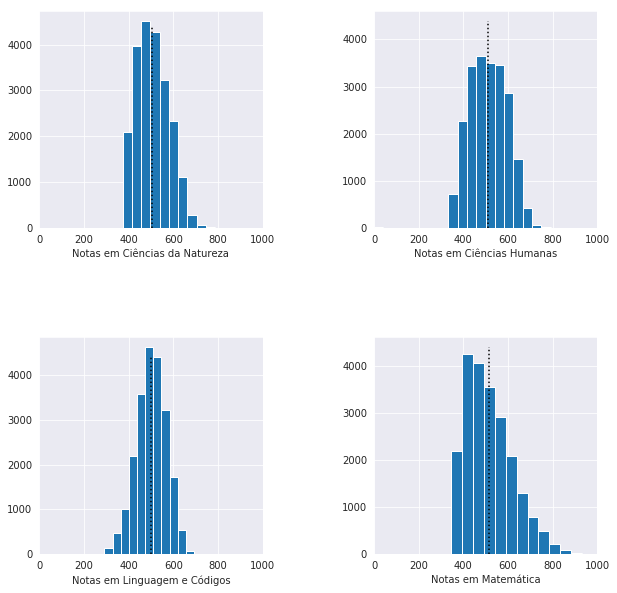

In [5]:
#Plotando os gráficos das distribuições de média
bins = 20

plt.figure(figsize=(10,10))

plt.subplot(2, 2, 1)
plt.hist(grades['NU_NOTA_CN'], bins=bins)
plt.xlabel('Notas em Ciências da Natureza')
plt.xlim(0, 1000)
plt.vlines(x=grades['NU_NOTA_CN'].mean(),
          ymin=0, ymax=grades['NU_NOTA_CN'].count()/5,
          linestyles='dotted')

plt.subplot(2, 2, 2)
plt.hist(grades['NU_NOTA_CH'], bins=bins)
plt.xlabel('Notas em Ciências Humanas')
plt.xlim(0, 1000)
plt.vlines(x=grades['NU_NOTA_CH'].mean(),
          ymin=0, ymax=grades['NU_NOTA_CH'].count()/5,
          linestyles='dotted')

plt.subplot(2, 2, 3)
plt.hist(grades['NU_NOTA_LC'], bins=bins)
plt.xlabel('Notas em Linguagem e Códigos')
plt.xlim(0, 1000)
plt.vlines(x=grades['NU_NOTA_LC'].mean(),
          ymin=0, ymax=grades['NU_NOTA_LC'].count()/5,
          linestyles='dotted')

plt.subplot(2, 2, 4)
plt.hist(grades['NU_NOTA_MT'], bins=bins)
plt.xlabel('Notas em Matemática')
plt.xlim(0, 1000)
plt.vlines(x=grades['NU_NOTA_MT'].mean(),
          ymin=0, ymax=grades['NU_NOTA_MT'].count()/5,
          linestyles='dotted')

plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()

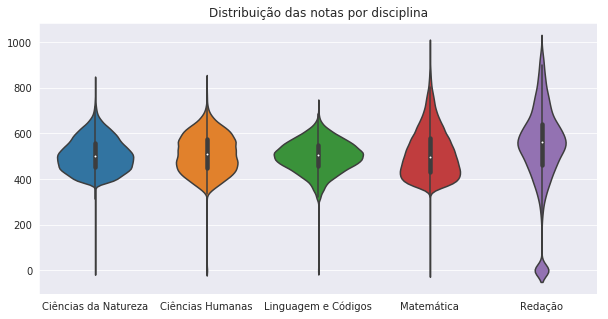

In [6]:
#Fazendo ViolinPlot das notas por escola
labels_subjects = ['Ciências da Natureza', 'Ciências Humanas', 'Linguagem e Códigos', 'Matemática', 'Redação']

plt.figure(figsize=(10, 5))
sns.violinplot(data=grades)
plt.xticks(np.arange(5), labels_subjects)
plt.title('Distribuição das notas por disciplina')
plt.show()

In [0]:
#Separando notas baseados no tipo de escola que a pessoa estudou
grade_type_cols = grade_cols + ['TP_ESCOLA']
grades_type_school = educ[grade_type_cols]

tipo1 = grades_type_school[grades_type_school['TP_ESCOLA'] == 1].drop('TP_ESCOLA', axis=1)
tipo2 = grades_type_school[grades_type_school['TP_ESCOLA'] == 2].drop('TP_ESCOLA', axis=1)
tipo3 = grades_type_school[grades_type_school['TP_ESCOLA'] == 3].drop('TP_ESCOLA', axis=1)
tipo4 = grades_type_school[grades_type_school['TP_ESCOLA'] == 4].drop('TP_ESCOLA', axis=1)

In [8]:
#descrições estatísticas dos candidatos baseados no tipo de escola em que estudaram no ensino médio
print('Candidatos que não responderam o tipo de escola:')
print(tipo1.describe(), '\n')

print('Candidatos que fizeram ensino médio em escolas públicas:')
print(tipo2.describe(), '\n')

print('Candidatos que fizeram ensino médio em escolas particulares:')
print(tipo3.describe(), '\n')

print('Candidatos que fizeram ensino médio no exterior:')
print(tipo4.describe())

Candidatos que não responderam o tipo de escola:
       NU_NOTA_CN  NU_NOTA_CH  NU_NOTA_LC  NU_NOTA_MT  NU_NOTA_REDACAO
count         0.0         0.0         0.0         0.0              0.0
mean          NaN         NaN         NaN         NaN              NaN
std           NaN         NaN         NaN         NaN              NaN
min           NaN         NaN         NaN         NaN              NaN
25%           NaN         NaN         NaN         NaN              NaN
50%           NaN         NaN         NaN         NaN              NaN
75%           NaN         NaN         NaN         NaN              NaN
max           NaN         NaN         NaN         NaN              NaN 

Candidatos que fizeram ensino médio em escolas públicas:
         NU_NOTA_CN    NU_NOTA_CH    NU_NOTA_LC    NU_NOTA_MT  NU_NOTA_REDACAO
count  17055.000000  17055.000000  17055.000000  17055.000000     17055.000000
mean     494.030753    497.383418    490.086391    497.947065       508.361184
std       65.452

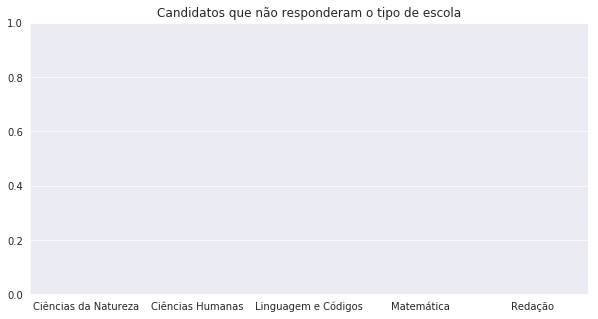

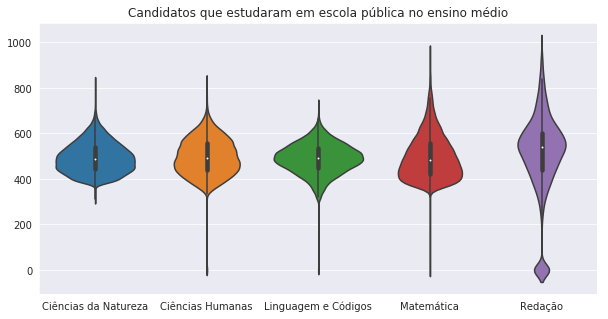

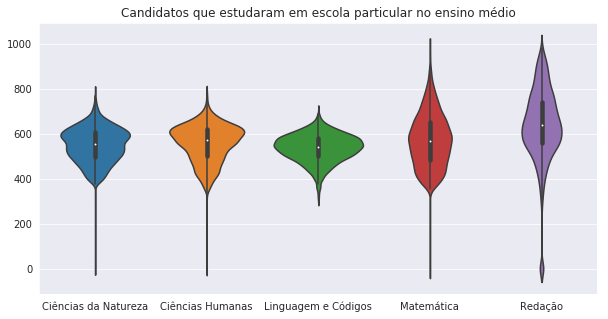

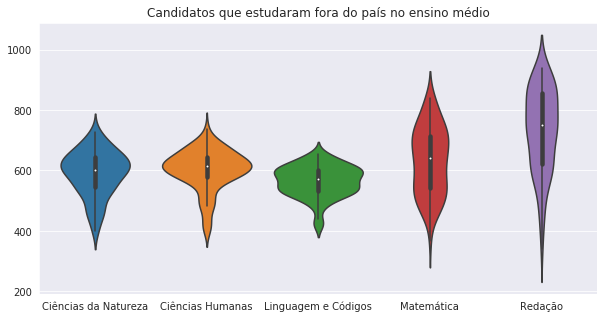

In [9]:
#ViolinPlot por tipo de escola que a pessoa estudou
size_plots = 0.5

plt.figure(figsize=(10, 5))
sns.violinplot(data=tipo1)
plt.xticks(np.arange(5), labels_subjects)
plt.title('Candidatos que não responderam o tipo de escola')


plt.figure(figsize=(10, 5))
sns.violinplot(data=tipo2)
plt.xticks(np.arange(5), labels_subjects)
plt.title('Candidatos que estudaram em escola pública no ensino médio')

plt.figure(figsize=(10, 5))
sns.violinplot(data=tipo3)
plt.xticks(np.arange(5), labels_subjects)
plt.title('Candidatos que estudaram em escola particular no ensino médio')

plt.figure(figsize=(10, 5))
sns.violinplot(data=tipo4)
plt.xticks(np.arange(5), labels_subjects)
plt.title('Candidatos que estudaram fora do país no ensino médio')

plt.subplots_adjust(
    hspace=0.5, wspace=0.5)
plt.show()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21947 entries, 11 to 159074
Columns: 139 entries, Unnamed: 0 to Q027
dtypes: float64(31), int64(65), object(43)
memory usage: 23.4+ MB
None
F    12422
M     9525
Name: TP_SEXO, dtype: int64


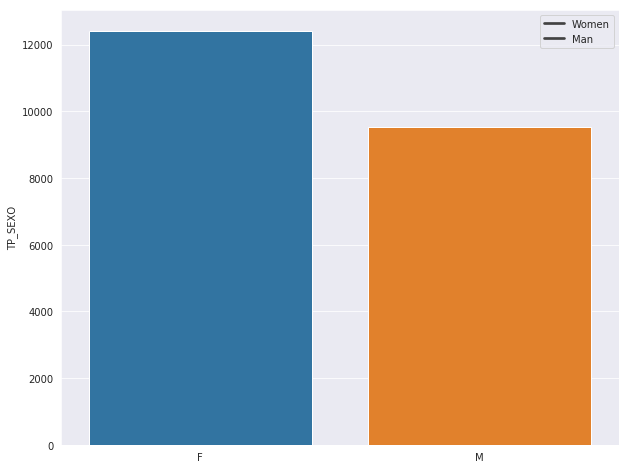

In [10]:
#Separando as notas de acordo com o sexo do candidato da prova
grades_sex_cols = grade_cols + ['TP_SEXO']
grades_sex = educ[grades_sex_cols]
print(educ.info())
grades_male = grades_sex[grades_sex['TP_SEXO'] == "M"].drop('TP_SEXO', axis=1)
grades_female = grades_sex[grades_sex['TP_SEXO'] == "F"].drop('TP_SEXO', axis=1)

sex_count = educ['TP_SEXO'].value_counts()
print(sex_count)
labels = ['Women', 'Man']
plt.figure(figsize=(10, 8))
sns.barplot(x=sex_count.index, y=sex_count)
plt.legend(labels)
plt.show()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21947 entries, 11 to 159074
Columns: 139 entries, Unnamed: 0 to Q027
dtypes: float64(31), int64(65), object(43)
memory usage: 23.4+ MB
None
Dados estatísticos dos homens:
        NU_NOTA_CN   NU_NOTA_CH   NU_NOTA_LC   NU_NOTA_MT  NU_NOTA_REDACAO
count  9525.000000  9525.000000  9525.000000  9525.000000      9525.000000
mean    517.834499   522.398940   503.376703   539.115664       532.344357
std      74.079080    85.790824    68.617488   113.038557       183.795485
min     331.100000     0.000000     0.000000     0.000000         0.000000
25%     459.400000   457.000000   459.600000   448.000000       460.000000
50%     513.200000   525.700000   506.500000   526.000000       560.000000
75%     571.600000   588.700000   552.100000   614.800000       640.000000
max     828.700000   832.500000   722.200000   981.700000       980.000000 

Dados estatísticos das mulheres:
         NU_NOTA_CN    NU_NOTA_CH    NU_NOTA_LC    NU_NOTA_MT  NU_NOT

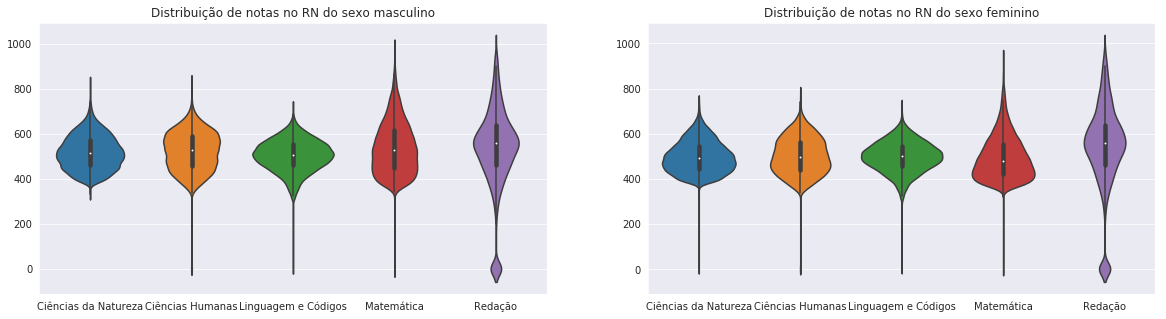

In [11]:
#Plotando violin plots por sexo e imprimindo atributos estatísticos das distribuições
print(educ.info())
print('Dados estatísticos dos homens:')
print(grades_male.describe(), '\n')

print('Dados estatísticos das mulheres:')
print(grades_female.describe())



plt.figure(figsize=(20, 5))

plt.subplot(121)
sns.violinplot(data=grades_male)
plt.xticks(np.arange(5), labels_subjects)
plt.title('Distribuição de notas no RN do sexo masculino')

plt.subplot(122)
sns.violinplot(data=grades_female)
plt.xticks(np.arange(5), labels_subjects)
plt.title('Distribuição de notas no RN do sexo feminino')

plt.show()

<class 'pandas.core.series.Series'>


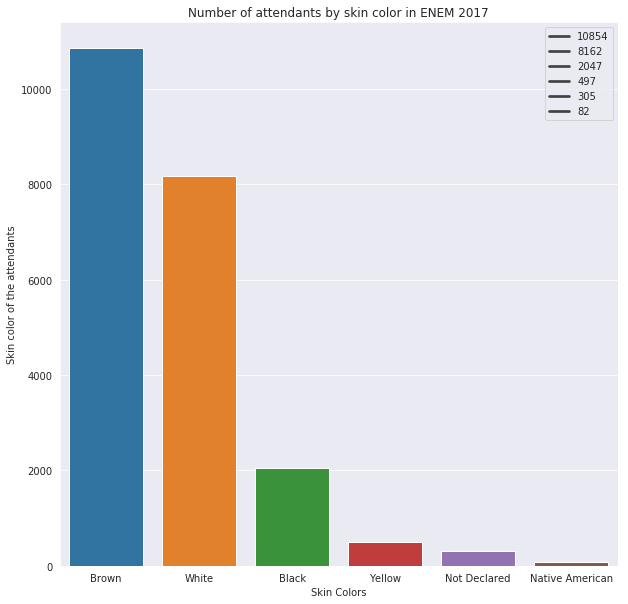

In [12]:
#Analisando dados de acordo com a cor de pele do candidato

grade_race_cols = grade_cols + ['TP_COR_RACA']
grade_race = educ[grade_race_cols]

not_declared = grade_race[grade_race['TP_COR_RACA'] == 0].drop('TP_COR_RACA', axis=1)
white = grade_race[grade_race['TP_COR_RACA'] == 1].drop('TP_COR_RACA', axis=1)
black = grade_race[grade_race['TP_COR_RACA'] == 2].drop('TP_COR_RACA', axis=1)
brown = grade_race[grade_race['TP_COR_RACA'] == 3].drop('TP_COR_RACA', axis=1)
yellow = grade_race[grade_race['TP_COR_RACA'] == 4].drop('TP_COR_RACA', axis=1)
native_american = grade_race[grade_race['TP_COR_RACA'] == 5].drop('TP_COR_RACA', axis=1)

labels = {0: 'Not Declared', 1: 'White',
          2: 'Black', 3: 'Brown',
          4: 'Yellow', 5: 'Native American'}
race_count = grade_race['TP_COR_RACA'].value_counts().rename(index=labels)
print(type(race_count))
plt.figure(figsize=(10, 10))
sns.barplot(x=race_count.index, y=race_count)
plt.legend(labels=race_count, loc="upper right")
plt.ylabel("Skin color of the attendants")
plt.xlabel("Skin Colors")
plt.title("Number of attendants by skin color in ENEM 2017")
plt.show()

In [13]:
#Analizando os atributos estatísticos para os diferentes candidatos
print('Dados estatísticos para os que não declararam sua cor:')
print(not_declared.var(), '\n')

print('Dados estatísticos para os que se declararam brancos:')
print(white.var(), '\n')

print('Dados estatísticos para os que se declararam negros: ')
print(black.var(), '\n')

print('Dados estatísticos para os que se declararam pardos: ')
print(brown.var(), '\n')

print('Dados estatísticos para os que se declararam amarelos: ')
print(yellow.var(), '\n')

print('Dados estatísticos para os que se declararam indígenas: ')
print(native_american.var())

Dados estatísticos para os que não declararam sua cor:
NU_NOTA_CN          6341.823138
NU_NOTA_CH          7633.294820
NU_NOTA_LC          5428.277847
NU_NOTA_MT         13453.538255
NU_NOTA_REDACAO    52015.358067
dtype: float64 

Dados estatísticos para os que se declararam brancos:
NU_NOTA_CN          5844.503605
NU_NOTA_CH          7412.153416
NU_NOTA_LC          4676.123909
NU_NOTA_MT         12962.253512
NU_NOTA_REDACAO    35386.547526
dtype: float64 

Dados estatísticos para os que se declararam negros: 
NU_NOTA_CN          4250.074405
NU_NOTA_CH          6179.475516
NU_NOTA_LC          4223.480409
NU_NOTA_MT          8883.808385
NU_NOTA_REDACAO    33335.579283
dtype: float64 

Dados estatísticos para os que se declararam pardos: 
NU_NOTA_CN          4712.301336
NU_NOTA_CH          6634.693780
NU_NOTA_LC          4361.635662
NU_NOTA_MT          9845.547145
NU_NOTA_REDACAO    34892.326890
dtype: float64 

Dados estatísticos para os que se declararam amarelos: 
NU_NOTA_CN         

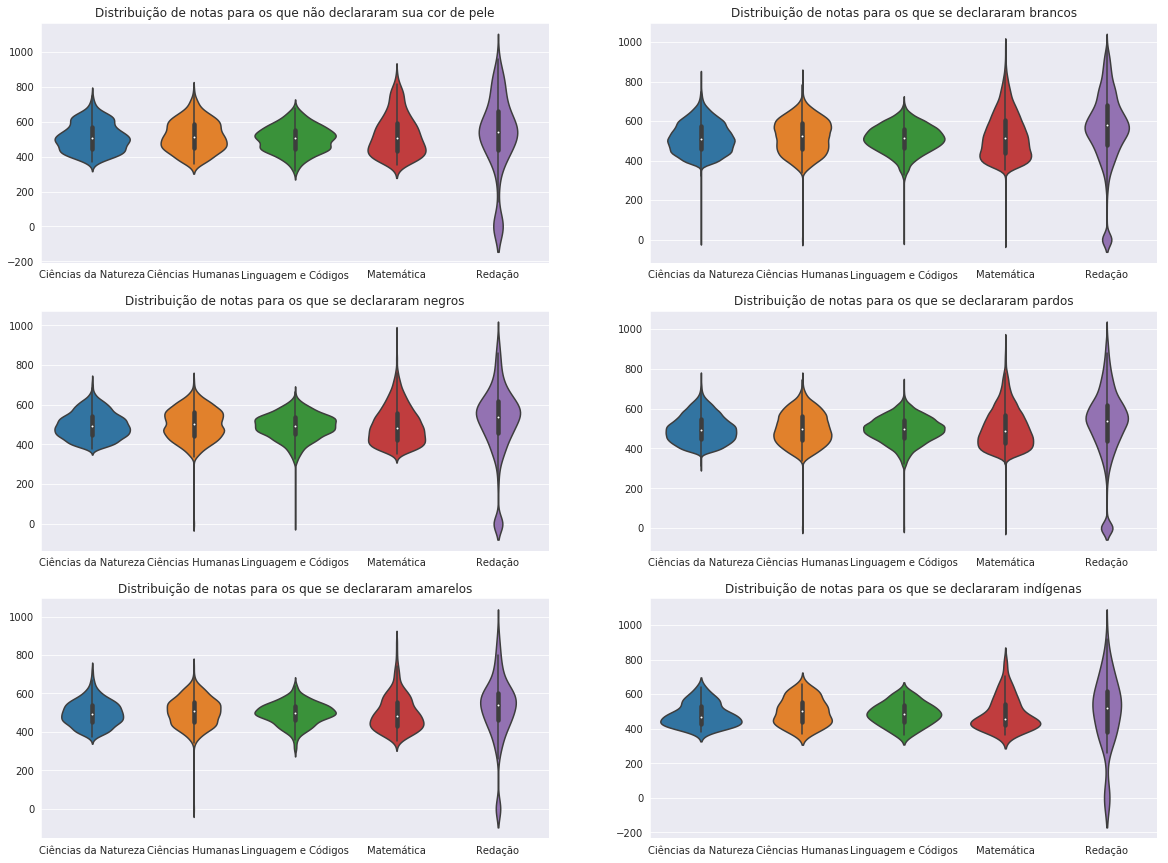

In [14]:
#Analisando as distribuições de notas dos candidatos com base na cor de pele:

def violin_plot_multi(data=None, position=0):
    plt.subplot(position)
    sns.violinplot(data=data)
    plt.xticks(np.arange(5), labels_subjects)


plt.figure(figsize=(20, 15))

violin_plot_multi(data=not_declared, position=321)
plt.title('Distribuição de notas para os que não declararam sua cor de pele')

violin_plot_multi(data=white, position=322)
plt.title('Distribuição de notas para os que se declararam brancos')

violin_plot_multi(data=black, position=323)
plt.title('Distribuição de notas para os que se declararam negros')

violin_plot_multi(data=brown, position=324)
plt.title('Distribuição de notas para os que se declararam pardos')

violin_plot_multi(data=yellow, position=325)
plt.title('Distribuição de notas para os que se declararam amarelos')

violin_plot_multi(data=native_american, position=326)
plt.title('Distribuição de notas para os que se declararam indígenas')

plt.show()

    NU_NOTA_CN  NU_NOTA_CH  NU_NOTA_LC  NU_NOTA_MT  NU_NOTA_REDACAO TP_SEXO
11       461.3       491.2       462.1       465.2            600.0       F
25       480.6       536.2       500.5       611.6            500.0       M
40       386.7       344.0       464.5       381.2            420.0       F
41       416.3       398.4       409.6       377.7              0.0       F
67       533.5       385.7       497.2       484.8            540.0       F


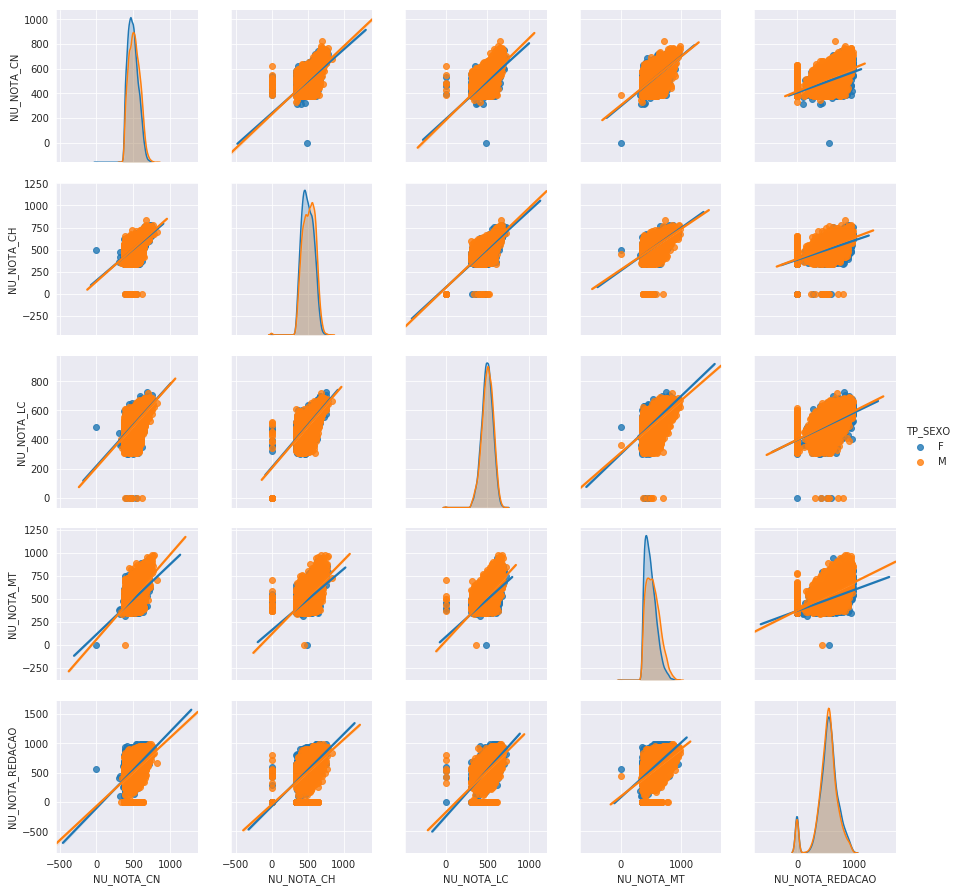

In [15]:
#Plotando as notas no modelo a x b, para identificar algum tipo de correlação
#e imprimindo a correlação pearson entre as notas
print(grades_sex.head())
sns.pairplot(grades_sex.dropna(), kind='reg', hue='TP_SEXO')
plt.show()

In [16]:
from scipy.stats import pearsonr

print("Correlação entre CN e CH")
print(pearsonr(x=grades['NU_NOTA_CN'], y=grades['NU_NOTA_CH'])[0], '\n')

print("Correlação entre CN e LC")
print(pearsonr(x=grades['NU_NOTA_CN'], y=grades['NU_NOTA_LC'])[0], '\n')

print("Correlação entre CN e MT")
print(pearsonr(x=grades['NU_NOTA_CN'], y=grades['NU_NOTA_MT'])[0], '\n')

print("Correlação entre CH e LC")
print(pearsonr(x=grades['NU_NOTA_CH'], y=grades['NU_NOTA_LC'])[0], '\n')

print("Correlação entre CH e MT")
print(pearsonr(x=grades['NU_NOTA_CH'], y=grades['NU_NOTA_MT'])[0], '\n')

print("Correlação entre LC e MT")
print(pearsonr(x=grades['NU_NOTA_LC'], y=grades['NU_NOTA_MT'])[0], '\n')

Correlação entre CN e CH
0.6277555493290428 

Correlação entre CN e LC
0.5993970989937739 

Correlação entre CN e MT
0.5892265454510215 

Correlação entre CH e LC
0.7137628936503764 

Correlação entre CH e MT
0.5957243340565179 

Correlação entre LC e MT
0.5750628570944609 



In [17]:
#Analisando as notas baseado no tipo de instituição de ensino que o candidato registrou na inscrição
#1: Federal, 2: Estadual, 3: Municipal, 4. Particular
#
grades_school_type_cols = grade_cols + ['TP_DEPENDENCIA_ADM_ESC']

grades_school_type = educ[grades_school_type_cols].dropna(0)


federal = grades_school_type[grades_school_type['TP_DEPENDENCIA_ADM_ESC'] == 1].drop('TP_DEPENDENCIA_ADM_ESC', axis=1)
estadual = grades_school_type[grades_school_type['TP_DEPENDENCIA_ADM_ESC'] == 2].drop('TP_DEPENDENCIA_ADM_ESC', axis=1)
municipal = grades_school_type[grades_school_type['TP_DEPENDENCIA_ADM_ESC'] == 3].drop('TP_DEPENDENCIA_ADM_ESC', axis=1)
particular = grades_school_type[grades_school_type['TP_DEPENDENCIA_ADM_ESC'] == 4].drop('TP_DEPENDENCIA_ADM_ESC', axis=1)

print('Descrição estatística das escolas federais\n', federal.describe(), '\n')

print('Descrição estatística das escolas estaduais\n', estadual.describe(), '\n')

print('Descrição estatística das escolas municipais\n', municipal.describe(), '\n')

print('Descrição estatística das escolas particulares\n', particular.describe(), '\n')

Descrição estatística das escolas federais
         NU_NOTA_CN   NU_NOTA_CH   NU_NOTA_LC   NU_NOTA_MT  NU_NOTA_REDACAO
count  2450.000000  2450.000000  2450.000000  2450.000000      2450.000000
mean    567.011143   580.330327   558.443469   606.853551       669.730612
std      66.343584    72.154972    55.322020   110.153043       141.283885
min     313.500000     0.000000     0.000000   340.000000         0.000000
25%     523.100000   542.125000   528.350000   527.125000       600.000000
50%     575.750000   592.350000   563.500000   609.250000       680.000000
75%     615.200000   628.150000   595.100000   688.725000       760.000000
max     828.700000   832.500000   729.500000   958.700000       980.000000 

Descrição estatística das escolas estaduais
          NU_NOTA_CN    NU_NOTA_CH    NU_NOTA_LC    NU_NOTA_MT  NU_NOTA_REDACAO
count  14558.000000  14558.000000  14558.000000  14558.000000     14558.000000
mean     481.834469    483.514597    478.662941    479.737897       481.4809

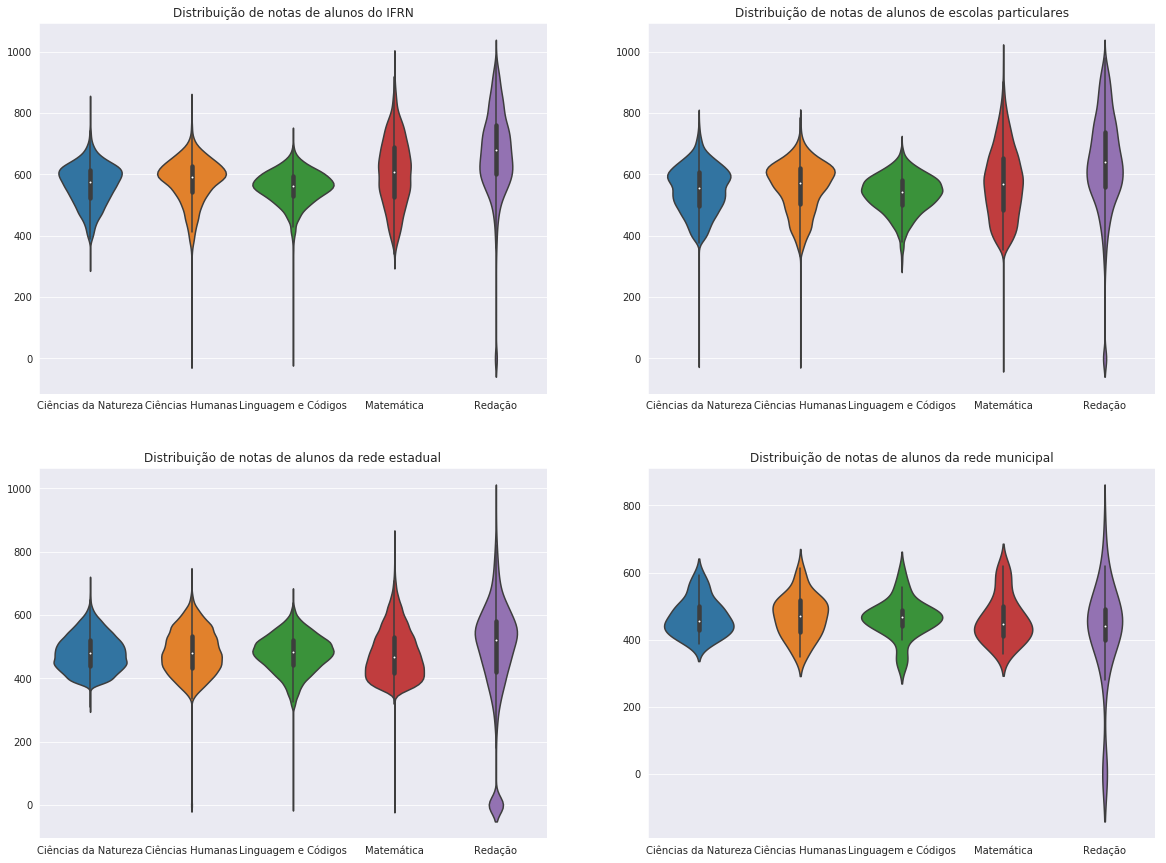

In [18]:
#Plotando gráficos de distribuição de notas
plt.figure(figsize=(20, 15))

plt.subplot(221)
sns.violinplot(data=federal)
plt.xticks(np.arange(5), labels_subjects)
plt.title("Distribuição de notas de alunos do IFRN")

plt.subplot(222)
sns.violinplot(data=particular)
plt.xticks(np.arange(5), labels_subjects)
plt.title("Distribuição de notas de alunos de escolas particulares")

plt.subplot(223)
sns.violinplot(data=estadual)
plt.xticks(np.arange(5), labels_subjects)
plt.title("Distribuição de notas de alunos da rede estadual")

plt.subplot(224)
sns.violinplot(data=municipal)
plt.xticks(np.arange(5), labels_subjects)
plt.title("Distribuição de notas de alunos da rede municipal")

plt.show()


In [19]:
from scipy.stats import kruskal

print(not_declared['NU_NOTA_LC'].mean(), 
     white['NU_NOTA_LC'].mean())
x = kruskal(grades_male['NU_NOTA_LC'], 
            grades_female['NU_NOTA_LC'])
           
x

503.47409836065606 510.8058809115417


KruskalResult(statistic=37.48446745097805, pvalue=9.214386762398985e-10)

# 3. Hypothesis testing of distributions
In this section, we will check if the distribution plotted on violonplot functions are really differente between them, by using hypothesis test with p-values.

In [20]:
'''
from scipy.stats import ttest_ind

alpha = 0.05

def test_between_dists(array1, array2, alpha=0.05):
    '''
'''
Hypothesis testing that array1 has the same mean distribution as array2.
    Returns True if p-values is greater than alpha, otherwise returns False.
    '''
'''
    
    stat, p = ttest_ind(array1, array2)
    if p > alpha:
        return True
    else:
        return False

def testing_distributions_on_attribute(df, attribute):
    cat_values = df[attribute].unique()
    #work_df = df.drop('attribute', axis=1)
    for i in cat_values:
        for j in cat_values:
            if i == j: 
                continue
            else:
                df1 = df[df[attribute] == i].drop(attribute, axis=1)
                df2 = df[df[attribute] == j].drop(attribute, axis=1)
                
    
#implementar comparação cor cada nota
def compare_grades_dists(df1, df2):
    cols = df1.columns.values.tolist()
    for col in cols:
        
'''


"\n    \n    stat, p = ttest_ind(array1, array2)\n    if p > alpha:\n        return True\n    else:\n        return False\n\ndef testing_distributions_on_attribute(df, attribute):\n    cat_values = df[attribute].unique()\n    #work_df = df.drop('attribute', axis=1)\n    for i in cat_values:\n        for j in cat_values:\n            if i == j: \n                continue\n            else:\n                df1 = df[df[attribute] == i].drop(attribute, axis=1)\n                df2 = df[df[attribute] == j].drop(attribute, axis=1)\n                \n    \n#implementar comparação cor cada nota\ndef compare_grades_dists(df1, df2):\n    cols = df1.columns.values.tolist()\n    for col in cols:\n        \n"

In [0]:
#testing_distributions_on_attribute(grades_school_type, 'TP_DEPENDENCIA_ADM_ESC')

In [22]:
import statsmodels.api as sm

df_educ_st = grades_school_type[['NU_NOTA_CN', 'TP_DEPENDENCIA_ADM_ESC']]

df_500 = df_educ_st[df_educ_st['NU_NOTA_CN'] < 500]
df_500['Cluster'] = '<500'

df_500_600 = df_educ_st[(df_educ_st['NU_NOTA_CN'] >= 500) & (df_educ_st['NU_NOTA_CN'] < 600)]
df_500_600['Cluster'] = '500-600'

df_600_700 = df_educ_st[(df_educ_st['NU_NOTA_CN'] >= 600) & (df_educ_st['NU_NOTA_CN'] < 700)]
df_600_700['Cluster'] = '600-700'

df_700_800 = df_educ_st[(df_educ_st['NU_NOTA_CN'] >= 700) & (df_educ_st['NU_NOTA_CN'] < 800)]
df_700_800['Cluster'] = '700-800'

df_800_900 = df_educ_st[(df_educ_st['NU_NOTA_CN'] >= 800) & (df_educ_st['NU_NOTA_CN'] < 900)]
df_800_900['Cluster'] = '800-900'

df_900_1000 = df_educ_st[(df_educ_st['NU_NOTA_CN'] >= 900) & (df_educ_st['NU_NOTA_CN'] <= 1000)]
df_900_1000['Cluster'] = '900-1000'

print(df_500_600.head())
'''
if df_educ_st['NU_NOTA_CN'].item() < 500:
    df_educ_st['<500'] = 1
elif df_educ_st['NU_NOTA_CN'].all() < 600:
    df_educ_st['500-600'] = 2
elif df_educ_st['NU_NOTA_CN'].all() < 700:
    df_educ_st['600-700'] = 3
elif df_educ_st['NU_NOTA_CN'].all() < 800:
    df_educ_st['700-800'] = 4
elif df_educ_st['NU_NOTA_CN'].all() < 900:
    df_educ_st['800-900'] = 5
else:
    df_educ_st['900-1000'] = 6
print(df_educ_st['NU_NOTA_CN'].all())
'''


#df_educ_st = grades_school_type['NU_NOTA_CN']
#df_educ_st['<500'] = df_educ_st
#def contingency_table(df, grade_col, index_attribute):
#    column_names = ['<500', '500-600', '600-700', '700-800', '800-900', '900-1000']
    

ImportError: ignored

In [0]:
frames = [df_500, df_500_600, df_600_700, df_700_800, df_800_900, df_900_1000]

df_educ_cn = pd.concat(frames, ignore_index=True)
print(df_educ_cn.head(10))

df_crosstab_cn = pd.crosstab(df_educ_cn['TP_DEPENDENCIA_ADM_ESC'], df_educ_cn['Cluster'])
print(df_crosstab_cn.head())

In [0]:

alpha = 0.05
gl = 15
rc = 25.0
results = stats.chi2_contingency(df_crosstab_cn)

if results[1] > alpha:
    print('As variáveis, tipo de escola e nota em ciências da natureza são independentes')
else:
    print('Rejeitamos a hipótese e com risco de 5% dizemos que as variáveis são dependentes')

In [23]:
def teste_chi_quadrado(df, notas, dependencia):
    alpha = 0.05
    df_educ_st = df[[notas, dependencia]].dropna()
    df_500 = df_educ_st[df_educ_st[notas] < 500]
    df_500['Cluster'] = '<500'
    
    df_500_600 = df_educ_st[(df_educ_st[notas] >= 500) & (df_educ_st[notas] < 600)]
    df_500_600['Cluster'] = '500-600'
    
    df_600_700 = df_educ_st[(df_educ_st[notas] >= 600) & (df_educ_st[notas] < 700)]
    df_600_700['Cluster'] = '600-700'
    
    df_700_800 = df_educ_st[(df_educ_st[notas] >= 700) & (df_educ_st[notas] < 800)]
    df_700_800['Cluster'] = '700-800'
    
    df_800_900 = df_educ_st[(df_educ_st[notas] >= 800) & (df_educ_st[notas] < 900)]
    df_800_900['Cluster'] = '800-900'
    
    df_900_1000 = df_educ_st[(df_educ_st[notas] >= 900) & (df_educ_st[notas] <= 1000)]
    df_900_1000['Cluster'] = '900-1000'
    frames = [df_500, df_500_600, df_600_700, df_700_800, df_800_900, df_900_1000]
    
    df_educ = pd.concat(frames, ignore_index=True)
    print(df_educ.head(10))
    
    df_crosstab_cn = pd.crosstab(df_educ[dependencia], df_educ['Cluster'])
    print(df_crosstab_cn.head())
    results = stats.chi2_contingency(df_crosstab_cn)
    print(results[1])
    if results[1] > alpha:
        print('As variáveis, tipo de escola e nota em ciências da natureza são independentes')
    else:
        print('Rejeitamos a hipótese e com risco de 5% dizemos que as variáveis são dependentes')
'''
'TP_DEPENDENCIA_ADM_ESC'
'TP_COR_RACA'
'TP_SEXO'
'''
teste_chi_quadrado(educ, 'NU_NOTA_LC', 'TP_SEXO')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-vi

   NU_NOTA_LC TP_SEXO Cluster
0       462.1       F    <500
1       464.5       F    <500
2       409.6       F    <500
3       497.2       F    <500
4       353.0       M    <500
5       454.8       F    <500
6       370.2       F    <500
7       402.5       F    <500
8       474.3       F    <500
9       446.4       F    <500
Cluster  500-600  600-700  700-800  <500
TP_SEXO                                 
F           5469      729        2  6222
M           4443      673        1  4408
5.691755944797046e-08
Rejeitamos a hipótese e com risco de 5% dizemos que as variáveis são dependentes


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


      Não declarado  Branca  Negra  Parda  Amarela  Indígena
Q006                                                        
A                28     355    104    574       23         6
B                99    2809   1001   4904      224        35
C                50    1541    434   2267      109        20
D                26     691    157    918       51         9
E                15     479    111    512       22         4
F                15     345     59    355       10         2
G                15     431     51    389       14         0
H                13     333     36    275       13         1
I                12     264     27    194        9         1
J                 7     171     24    116        6         0
K                 2     115      8     74        2         0
L                 6      75     10     47        2         0
M                 3      89      6     42        1         2
N                 5     123      5     64        2         1
O                 3     

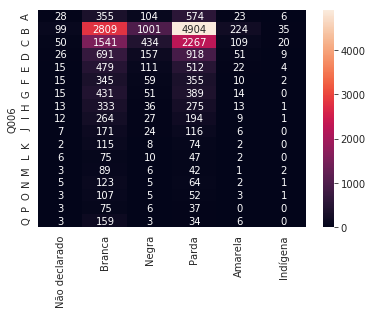

In [24]:
df_cor_salario = pd.crosstab(educ['Q006'], educ['TP_COR_RACA'])
alpha = 0.05

df_cor_salario.columns = ['Não declarado', 'Branca', 'Negra', 'Parda', 'Amarela', 'Indígena']
print(df_cor_salario)
ax = sns.heatmap(df_cor_salario, annot=True, fmt="d")
results = stats.chi2_contingency(df_cor_salario)
critical = stats.chi2.ppf(1-alpha, results[2])
print(critical)
print(results[0])
print(results[1])
if results[1] > alpha:
  print('Não há dependencia entre cor de pele e renda')
else:
  print('Rejeitamos a hipótese e há dependencia entre a cor de pele e a renda')

In [0]:

import prince

cn_categorical = pd.cut(x=educ['NU_NOTA_CN'], bins=[0, 500, 600, 700, 800, 900, 1000], include_lowest=True)
ch_categorical = pd.cut(x=educ['NU_NOTA_CH'], bins=[0, 500, 600, 700, 800, 900, 1000], include_lowest=True)
lc_categorical = pd.cut(x=educ['NU_NOTA_LC'], bins=[0, 500, 600, 700, 800, 900, 1000], include_lowest=True)
mt_categorical = pd.cut(x=educ['NU_NOTA_MT'], bins=[0, 500, 600, 700, 800, 900, 1000], include_lowest=True)
redacao_categorical = pd.cut(x=educ['NU_NOTA_REDACAO'], bins=[0, 500, 600, 700, 800, 900, 1000], include_lowest=True)

educ['NU_NOTA_CN_CAT'] = cn_categorical
educ['NU_NOTA_CH_CAT'] = ch_categorical
educ['NU_NOTA_LC_CAT'] = lc_categorical
educ['NU_NOTA_MT_CAT'] = mt_categorical
educ['NU_NOTA_REDACAO_CAT'] = redacao_categorical

#educ[['NU_NOTA_CN', 'NU_NOTA_CN_CAT','NU_NOTA_CH', 'NU_NOTA_CH_CAT','NU_NOTA_LC', 'NU_NOTA_LC_CAT','NU_NOTA_MT', 'NU_NOTA_MT_CAT','NU_NOTA_REDACAO', 'NU_NOTA_REDACAO_CAT',]].head()

categories_cols = [
    'CO_MUNICIPIO_RESIDENCIA',
    'NU_NOTA_CN_CAT',
    'NU_NOTA_CH_CAT',
    'NU_NOTA_LC_CAT',
    'NU_NOTA_MT_CAT',
    'NU_NOTA_REDACAO_CAT',
    #'CO_UF_RESIDENCIA',
    #'SG_UF_RESIDENCIA',
    'NU_IDADE',
    'TP_SEXO',
    'TP_ESTADO_CIVIL',
    'TP_COR_RACA',
    'TP_NACIONALIDADE',
    'TP_DEPENDENCIA_ADM_ESC',
    'CO_MUNICIPIO_NASCIMENTO',
    'TP_ST_CONCLUSAO',
    'TP_ANO_CONCLUIU',
    'TP_ESCOLA',
    'TP_ENSINO',
    #'IN_TREINEIRO',
    #'CO_ESCOLA',
    #'CO_UF_ESC',
    #'TP_DEPENDENCIA_ADM_ESC',
    #'TP_LOCALIZACAO_ESC',
    #'TP_SIT_FUNC_ESC',
    #'IN_BAIXA_VISAO',
    #'IN_CEGUEIRA',
    #'IN_SURDEZ',
    #'IN_DEFICIENCIA_AUDITIVA',
    #'IN_SURDO_CEGUEIRA',
    #'IN_DEFICIENCIA_FISICA',
    #'IN_DEFICIENCIA_MENTAL',
    #'IN_DEFICIT_ATENCAO',
    #'IN_DISLEXIA',
    #'IN_DISCALCULIA',
    #'IN_AUTISMO',
    #'IN_VISAO_MONOCULAR',
    #'IN_OUTRA_DEF',
    #'IN_GESTANTE',
    #'IN_LACTANTE',
    #'IN_IDOSO',
    #'IN_ESTUDA_CLASSE_HOSPITALAR',
    #'IN_SEM_RECURSO',
    #'IN_BRAILLE',
    #'IN_AMPLIADA_24',
    #'IN_AMPLIADA_18',
    #'IN_LEDOR',
    #'IN_ACESSO',
    #'IN_TRANSCRICAO',
    #'IN_LIBRAS',
    #'IN_LEITURA_LABIAL',
    #'IN_MESA_CADEIRA_RODAS',
    #'IN_MESA_CADEIRA_SEPARADA',
    #'IN_APOIO_PERNA',
    #'IN_GUIA_INTERPRETE',
    #'IN_COMPUTADOR',
    #'IN_CADEIRA_ESPECIAL',
    #'IN_CADEIRA_CANHOTO',
    #'IN_CADEIRA_ACOLCHOADA',
    #'IN_PROVA_DEITADO',
    #'IN_MOBILIARIO_OBESO',
    #'IN_LAMINA_OVERLAY',
    #'IN_PROTETOR_AURICULAR',
    #'IN_MEDIDOR_GLICOSE',
    #'IN_MAQUINA_BRAILE',
    #'IN_SOROBAN',
    #'IN_MARCA_PASSO',
    #'IN_SONDA',
    #'IN_MEDICAMENTOS',
    #'IN_SALA_INDIVIDUAL',
    #'IN_SALA_ESPECIAL',
    #'IN_SALA_ACOMPANHANTE',
    #'IN_MOBILIARIO_ESPECIFICO',
    #'IN_MATERIAL_ESPECIFICO',
    #'IN_NOME_SOCIAL',
    #'CO_MUNICIPIO_PROVA',
    #'CO_UF_PROVA',
    #'SG_UF_PROVA',
    #'TP_PRESENCA_CN',
    #'TP_PRESENCA_CH',
    #'TP_PRESENCA_LC',
    #'TP_PRESENCA_MT',
    #'TP_LINGUA',
    #'TP_STATUS_REDACAO',
    'Q001',
    'Q002',
    'Q003',
    'Q004',
    'Q005',
    'Q006',
    'Q007',
    'Q008',
    'Q009',
    'Q010',
    'Q011',
    'Q012',
    'Q013',
    'Q014',
    'Q015',
    'Q016',
    'Q017',
    'Q018',
    'Q019',
    'Q020',
    'Q021',
    'Q022',
    'Q023',
    'Q024',
    'Q025',
    'Q026',
    'Q027'
]

df_categories_ca = educ[categories_cols].astype('category')


     NU_NOTA_MT_CAT Q006  TP_DEPENDENCIA_ADM_ESC
11  (-0.001, 500.0]    C                     2.0
25   (600.0, 700.0]    B                     2.0
40  (-0.001, 500.0]    C                     2.0
41  (-0.001, 500.0]    B                     2.0
67  (-0.001, 500.0]    B                     2.0
[0.6562541755796962, 0.3910511008792198]
8.0
[0.08203177194746203, 0.048881387609902474]
<bound method MCA.row_coordinates of MCA(check_input=True, copy=True, engine='auto', n_components=2, n_iter=3,
    random_state=42)>


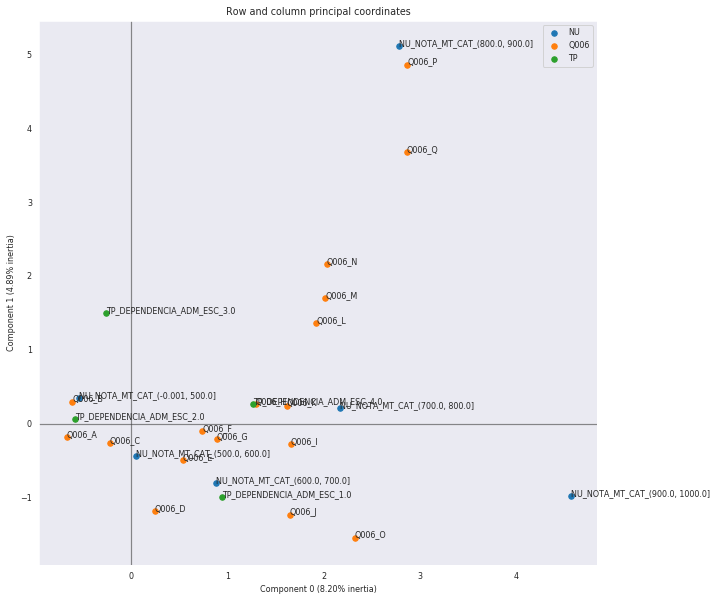

In [41]:
import prince

plt.rcParams.update({'font.size': 8})

df_tipo_nota = educ[[  'NU_NOTA_MT_CAT', 'Q006', 'TP_DEPENDENCIA_ADM_ESC']]
teste = educ[[ 'Q006', 'NU_NOTA_MT_CAT']]
print(df_tipo_nota.head())


mca_cor = prince.MCA(
  n_components=2,
  n_iter=3,
  copy=True,
  check_input=True,
  engine='auto',
  random_state=42)
mca2 = prince.MCA(
  n_components=-1,
  n_iter=3,
  copy=True,
  check_input=True,
  engine='auto',
  random_state=42)

#tbl = pd.crosstab(educ['NU_NOTA_REDACAO'], educ['Q006'])

#mca_cor = prince.MCA(n_components=-1).fit(tbl)
#fig = plt.figure()
#fig, ax = mca_cor.plot_rows_columns(axes=[0, 1], show_row_labels=True, show_column_labels=True)
#plt.show()

mca_cor.fit(df_tipo_nota)


#mca2.fit(teste)
#plt.figure()

ax = mca_cor.plot_coordinates(
     X=df_tipo_nota,
     ax=None,
     figsize=(10, 10),
     show_row_points=False,
     row_points_size=10,
     show_row_labels=False,
     show_column_points=True,
     column_points_size=30,
     show_column_labels=True
)

print(mca_cor.eigenvalues_)
print(mca_cor.total_inertia_)
print(mca_cor.explained_inertia_)
print(mca_cor.row_coordinates)
'''
mca2.plot_coordinates(
     X=teste,
     ax=None,
     figsize=(6, 6),
     show_row_points=False,
     row_points_size=10,
     show_row_labels=False,
     show_column_points=True,
     column_points_size=30,
     show_column_labels=True
)

'''


plt.show()






In [0]:
mca = prince.MCA(
  n_components=2,
  n_iter=3,
  copy=True,
  check_input=True,
  engine='auto',
  random_state=42)
mca.fit(df_categories_ca)

ax = mca.plot_coordinates(
     X=df_categories_ca,
     ax=None,
     figsize=(10, 10),
     show_row_points=False,
     row_points_size=10,
     show_row_labels=False,
     show_column_points=True,
     column_points_size=30,
     show_column_labels=False
     
)
plt.show()

# 4. Clustering the data
In this section, we will use clustering techniques to study diferent profiles of Rio Grande do Norte's students. But first, we have to clean the data so we can organize into categories.

In [0]:
#!pip install fastcluster

In [0]:
from sklearn.cluster import KMeans

df_educ_cluster_map = educ[grade_cols].dropna()
#sns.clustermap(data=df_educ_cluster_map, method='average')
clf = KMeans(n_clusters=5, random_state=0).fit(df_educ_cluster_map)

#plt.show()
#df_educ_cluster_map['Centers'] = np.array(clf.predict(df_educ_cluster_map))
#print(df_educ_cluster_map.head())

In [0]:
#print(df_educ_cluster_map['Centers'].value_counts())
#print(clf.cluster_centers_)

In [0]:
from scipy.cluster import hierarchy

#Z = hierarchy.linkage(df_educ_cluster_map, 'average')

# 5. Map of RN's  peformance on ENEM 2017

In [0]:
esc_federais = educ[educ['TP_DEPENDENCIA_ADM_ESC'] == 1]

esc_federais

In [0]:
import folium

m = folium.Map(
    location=[-5.826592, -35.212558],
    zoom_start=7,
    tiles='Stamen Terrain'
)

m